In [1]:
%reload_ext autoreload
%autoreload 2
from scanpy_helpers_1 import *
from scanpy_helpers_2 import *
warnings.filterwarnings('ignore')
%matplotlib inline

In [5]:
df = pd.read_csv('s3://darmanis-group/singlecell_lungadeno/TN_bulkized_data.csv', index_col = 0)
df.head()

,A1BG,A1BG-AS1,A1CF,A2M,A2M-AS1,A2ML1,A2MP1,A3GALT2,A4GALT,A4GNT,...,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3,sample_name,patient_id,dor,dor_class
LT_S34,0.003117,0.0,0.0,0.006594,0.0,0.000779,0,0.0,0.194448,0.0,...,0.688767,0.0,1.173231,0.720418,0.000000,1.248528,LT_S34,TH_205,0.12,low
LT_S43,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.009454,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,LT_S43,TH_217,0.43,low
LT_S45,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.000000,0.0,...,10.834236,0.0,0.000000,0.471054,0.000000,0.000000,LT_S45,TH_218,0.31,low
LT_S49,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.177676,0.0,...,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,LT_S49,TH_223,0.50,low
LT_S51,0.000000,0.0,0.0,0.000000,0.0,0.000000,0,0.0,0.277587,0.0,...,0.029913,0.0,0.014789,0.308163,0.007502,0.108279,LT_S51,TH_227,0.57,high


In [12]:
omit_colnames = ['sample_name','patient_id','dor','dor_class']
genes = list(set(df.columns)-set(omit_colnames))
ref1 = df[df.dor_class == 'low'].loc[:, genes]
ref2 = df[df.dor_class == 'high'].loc[:, genes]

mwu_df = pd.DataFrame()
for test in ['greater','less']:
    stat_pval_tuple = parallel_mwu(genes, 
                                   ref1,
                                   ref2,  
                                   test,
                                   7)
    stat_list = stat_pval_tuple[0]
    pval_list = stat_pval_tuple[1]
    slice_df = (pd.DataFrame({'gene':genes,
                             'stat_1':stat_list,
                             'pval_1':pval_list
                            })
              )
    slice_df['test'] = test
    mwu_df = mwu_df.append(slice_df)


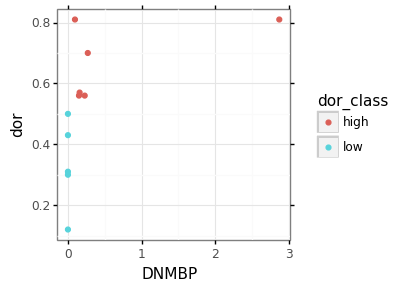

<ggplot: (8782587925245)>

In [28]:

goi = 'DNMBP'
plotnine.options.figure_size = (3,3)
(ggplot(df.loc[:,[goi]+omit_colnames])
 + theme_bw()
 + geom_point(aes(goi,'dor', color = 'dor_class'))
#  + scale_x_continuous(trans='log2')
)

In [38]:
mwu_df[mwu_df.test == 'less'].sort_values('pval_1', ascending = True)

,gene,stat_1,pval_1,test
11467,ZC3H10,0.0,0.002747,less
11595,LINC01061,0.0,0.002747,less
6834,USP45,0.0,0.002747,less
7571,TOX,0.0,0.002747,less
12871,TRPV1,0.0,0.002747,less
5232,MON1A,0.0,0.002747,less
3832,RLN1,0.0,0.002747,less
1178,TTLL13P,0.0,0.002747,less
11850,DNMBP,0.0,0.002747,less
17415,EEF2K,0.0,0.002747,less


In [29]:
mwu_df.to_csv('/home/ubuntu/data/mwu_luad.csv')

In [31]:
fn = '/home/ubuntu/data/mwu_luad.csv'
! aws s3 cp {fn} s3://darmanis-group/singlecell_lungadeno/

upload: ../../data/mwu_luad.csv to s3://darmanis-group/singlecell_lungadeno/mwu_luad.csv


In [5]:
print('computing...')

run_me = True

if run_me == True:

    # Protocol:
        # download counts table: https://gdc.xenahubs.net/download/TCGA-SKCM/Xena_Matrices/TCGA-SKCM.htseq_fpkm-uq.tsv.gz
        # gunzip file
        # push to s3: s3://daniel.le-work/MEL_project/TCGA-SKCM.htseq_fpkm-uq.tsv
        
    import json, os, glob, tqdm, mygene
    import pandas as pd

    # melanoma files
    counts_table = 's3://s3://daniel.le-work/MEL_project/TCGA-LUAD.htseq_fpkm-uq.tsv'
    clinical_outcomes = 's3://daniel.le-work/MEL_project/tcga_metadata.csv'
    gene_conversion = 's3://daniel.le-work/MEL_project/gencode.v22.annotation.gene.probeMap'
    group = 'luad'

    wkdir, s3dir = '/home/ubuntu/data/DL20181011_melanocyte_test_data', 'daniel.le-work/MEL_project'

    # ingest counts table
    tcga_df = pd.read_csv(counts_table, sep = '\t').rename(columns = {'Ensembl_ID':'id'})

    # ingest ensembl to symbol conversion table
    ens2sym_df = (pd.read_csv(gene_conversion, sep = '\t', index_col = 0)
                  .reset_index()
                  .loc[:,['gene','id']]
                 )

    # merge symbols and drop ensembl
    tcga_df = (pd.merge(tcga_df, ens2sym_df, 'left', 'id')
               .drop('id', axis = 1)
               .dropna()
               .set_index('gene')
              )
    
    # transpose and create bcr column
    tcga_df_fltr = tcga_df.T.reset_index().rename(columns = {'index':'submitter_id'})
    tcga_df_fltr['bcr_patient_barcode'] = ['-'.join(x.split('-')[:3]) for x in tcga_df_fltr['submitter_id']]

    # align metadata
    ## ref = https://www.sciencedirect.com/science/article/pii/S0092867418302290#mmc1
    tcga_meta = pd.read_csv(clinical_outcomes,index_col=0)
    tcga_meta_ordered = pd.merge(tcga_df_fltr.loc[:,'bcr_patient_barcode'],
                                     tcga_meta,
                                     'left',
                                     'bcr_patient_barcode'
                                    )
    # drop duplicate records
    tcga_meta_ordered[~tcga_meta_ordered.bcr_patient_barcode.duplicated('first')]
    
    # append primary vs secondary site
    origin_filter = pd.read_csv('s3://daniel.le-work/MEL_project/tissue_origin.csv')
    origin_filter['site'] = ['primary' if x.lower().find('skin') != -1 else 'secondary' \
                         for x in origin_filter.tissue_origin.tolist()]
    origin_filter['bcr_patient_barcode'] = ['-'.join(x.split('-')[:3]) for x in origin_filter['submitter_id']]
    tcga_meta_ordered = pd.merge(tcga_meta_ordered,
                                 origin_filter.loc[:,['site','bcr_patient_barcode']],
                                 'left',
                                 'bcr_patient_barcode'
                                )

    # write dfs to csv and push to s3
    print('computing...')
    tcga_df_fltr = tcga_df_fltr.drop('bcr_patient_barcode', axis = 1).set_index('submitter_id').T
    fn_dict = {'tcga_df_fltr':f'/home/ubuntu/data/DL20181011_melanocyte_test_data/tcga_{group}_counts.csv',
               'tcga_meta_ordered':f'/home/ubuntu/data/DL20181011_melanocyte_test_data/tcga_{group}_metadata.csv'
              }
    for key,value in fn_dict.items():
        eval(key).to_csv(value)
        ! aws s3 cp {value} s3://{s3dir}/
        

computing...
computing...
upload: ../../data/DL20181011_melanocyte_test_data/tcga_luad_counts.csv to s3://daniel.le-work/MEL_project/tcga_luad_counts.csv
upload: ../../data/DL20181011_melanocyte_test_data/tcga_luad_metadata.csv to s3://daniel.le-work/MEL_project/tcga_luad_metadata.csv


In [4]:
display(tcga_df_fltr.head(), tcga_meta_ordered.head())

submitter_id,TCGA-05-4244-01A,TCGA-05-4249-01A,TCGA-05-4250-01A,TCGA-05-4382-01A,TCGA-05-4384-01A,TCGA-05-4389-01A,TCGA-05-4390-01A,TCGA-05-4395-01A,TCGA-05-4396-01A,TCGA-05-4397-01A,...,TCGA-NJ-A4YG-01A,TCGA-NJ-A4YI-01A,TCGA-NJ-A4YP-01A,TCGA-NJ-A4YQ-01A,TCGA-NJ-A55A-01A,TCGA-NJ-A55O-01A,TCGA-NJ-A55R-01A,TCGA-NJ-A7XG-01A,TCGA-O1-A52J-01A,TCGA-S2-AA1A-01A
gene,,,,,,,,,,,,,,,,,,,,,
RP11-368I23.2,10.521398,9.838072,8.940275,8.396628,11.373653,0.000000,0.000000,0.000000,11.730294,0.000000,...,0.000000,0.000000,0.000000,0.000000,15.696857,10.728909,10.660537,12.394589,13.165729,9.858564
RP11-742D12.2,0.000000,7.579612,0.000000,0.000000,0.000000,8.104774,7.098992,0.000000,7.304654,5.342061,...,0.000000,8.053258,0.000000,6.976059,10.558872,0.000000,11.073942,8.548771,0.000000,0.000000
RAB4B,16.417005,15.702938,15.788083,16.277605,16.404421,16.387636,15.532751,15.571409,15.493911,16.023008,...,16.608135,17.589675,16.114108,16.922083,16.550842,17.302621,16.765882,16.784215,16.643197,17.265396
AC104183.2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
C12orf5,17.030250,16.269985,16.037091,16.890040,16.686755,17.064645,16.772573,17.941919,16.194387,15.700203,...,16.406488,16.585225,16.543977,15.943063,15.902219,17.526719,16.398661,16.234987,16.033276,16.290499


,bcr_patient_barcode,type,age_at_initial_pathologic_diagnosis,gender,race,ajcc_pathologic_tumor_stage,clinical_stage,histological_type,histological_grade,initial_pathologic_dx_year,...,OS,OS.time,DSS,DSS.time,DFI,DFI.time,PFI,PFI.time,Redaction,site
0,TCGA-05-4244,LUAD,70.0,MALE,[Not Available],Stage IV,[Not Applicable],Lung Adenocarcinoma,[Not Available],2009.0,...,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,NaN,NaN
1,TCGA-05-4249,LUAD,67.0,MALE,[Not Available],Stage IB,[Not Applicable],Lung Adenocarcinoma,[Not Available],2007.0,...,0.0,1523.0,0.0,1523.0,NaN,NaN,0.0,1523.0,NaN,NaN
2,TCGA-05-4250,LUAD,79.0,FEMALE,[Not Available],Stage IIIA,[Not Applicable],Lung Adenocarcinoma,[Not Available],2007.0,...,1.0,121.0,NaN,121.0,NaN,NaN,0.0,121.0,NaN,NaN
3,TCGA-05-4382,LUAD,68.0,MALE,[Not Available],Stage IB,[Not Applicable],Lung Adenocarcinoma,[Not Available],2009.0,...,0.0,607.0,0.0,607.0,1.0,334.0,1.0,334.0,NaN,NaN
4,TCGA-05-4384,LUAD,66.0,MALE,[Not Available],Stage IIIA,[Not Applicable],Lung Adenocarcinoma,[Not Available],2009.0,...,0.0,426.0,0.0,426.0,NaN,NaN,1.0,183.0,NaN,NaN


In [13]:
clin = pd.read_csv(clinical_outcomes)

In [20]:
barcodes = [x for x in clin[clin.type == 'LUAD'].bcr_patient_barcode]
display(len(barcodes), len(set(barcodes)))

522

522

In [21]:
barcodes[:1]

['TCGA-05-4244']

In [8]:
counts = pd.read_csv(counts_table, sep = '\t', index_col = 0)

In [22]:
counts.columns.tolist()

['TCGA-05-4244-01A',
 'TCGA-05-4249-01A',
 'TCGA-05-4250-01A',
 'TCGA-05-4382-01A',
 'TCGA-05-4384-01A',
 'TCGA-05-4389-01A',
 'TCGA-05-4390-01A',
 'TCGA-05-4395-01A',
 'TCGA-05-4396-01A',
 'TCGA-05-4397-01A',
 'TCGA-05-4398-01A',
 'TCGA-05-4402-01A',
 'TCGA-05-4403-01A',
 'TCGA-05-4405-01A',
 'TCGA-05-4410-01A',
 'TCGA-05-4415-01A',
 'TCGA-05-4417-01A',
 'TCGA-05-4418-01A',
 'TCGA-05-4420-01A',
 'TCGA-05-4422-01A',
 'TCGA-05-4424-01A',
 'TCGA-05-4425-01A',
 'TCGA-05-4426-01A',
 'TCGA-05-4427-01A',
 'TCGA-05-4430-01A',
 'TCGA-05-4432-01A',
 'TCGA-05-4433-01A',
 'TCGA-05-4434-01A',
 'TCGA-05-5420-01A',
 'TCGA-05-5423-01A',
 'TCGA-05-5425-01A',
 'TCGA-05-5428-01A',
 'TCGA-05-5429-01A',
 'TCGA-05-5715-01A',
 'TCGA-35-3615-01A',
 'TCGA-35-4122-01A',
 'TCGA-35-4123-01A',
 'TCGA-35-5375-01A',
 'TCGA-38-4625-01A',
 'TCGA-38-4625-11A',
 'TCGA-38-4626-01A',
 'TCGA-38-4626-11A',
 'TCGA-38-4627-01A',
 'TCGA-38-4627-11A',
 'TCGA-38-4628-01A',
 'TCGA-38-4629-01A',
 'TCGA-38-4630-01A',
 'TCGA-38-463